In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.tree import  DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import subprocess

import sklearn.metrics as met

In [2]:
df = pd.read_csv("novo_prep.csv")

In [3]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,7.0,4.5,0,0,38,5,10,1
1,158578688,0.00,161065,26,7.0,3.5,0,4,37,5,23,1
2,100524032,0.00,188583,2822,6.0,4.5,0,4,37,5,3,1
3,128512000,0.00,262241,649,7.0,4.5,2,4,37,5,9,1
4,92774400,0.00,985920,5320,8.0,5.0,0,4,37,5,45,1


In [4]:
X = df.drop('user_rating', axis = 1)
X.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.5,0,0,38,5,10,1
1,158578688,0.00,161065,26,3.5,0,4,37,5,23,1
2,100524032,0.00,188583,2822,4.5,0,4,37,5,3,1
3,128512000,0.00,262241,649,4.5,2,4,37,5,9,1
4,92774400,0.00,985920,5320,5.0,0,4,37,5,45,1


In [5]:
y = df['user_rating']
y.head()

0    7.0
1    7.0
2    6.0
3    7.0
4    8.0
Name: user_rating, dtype: float64

In [6]:
y.unique()

array([7., 6., 8., 9., 5., 3., 4., 0., 2., 1.])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

In [8]:
dt = DecisionTreeClassifier()

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
print('Klase ', dt.classes_)

Klase  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [11]:
print('feature_importances_', '\n', pd.Series(dt.feature_importances_))


feature_importances_ 
 0     0.131300
1     0.041443
2     0.361461
3     0.121513
4     0.157184
5     0.028128
6     0.031734
7     0.041955
8     0.028137
9     0.055394
10    0.001751
dtype: float64


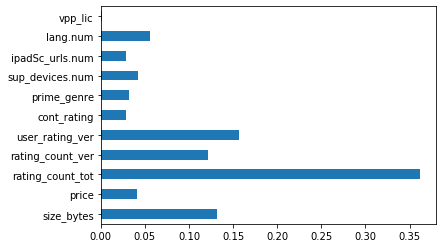

In [12]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.savefig('dt_importance.jpg')

In [13]:
dt.score(X_train, y_train)

1.0

In [14]:
dt.score(X_test, y_test)

0.5365740740740741

In [15]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [16]:
conf = metrics.confusion_matrix(y_test, y_test_pred)
conf

array([[279,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  11,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0,   1,   2,   0,   5,   0,   5,   2,   1,   1],
       [  0,   0,   2,   5,   6,   7,   2,   6,   4,   0],
       [  0,   0,   2,   3,   8,  12,  15,   8,   9,   2],
       [  0,   0,   0,   5,  19,  20,  27,  22,  19,   3],
       [  0,   0,   4,   5,   6,  37,  64,  51,  38,   6],
       [  0,   0,   0,   2,  13,  15,  76, 202, 154,  26],
       [  0,   0,   4,   2,   7,  23,  40, 152, 507,  64],
       [  0,   0,   0,   4,   2,   4,  10,  12,  54,  61]])

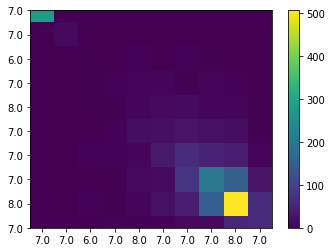

In [17]:
plt.imshow(conf)
plt.colorbar()
plt.xticks(range(0,10), y)
plt.yticks(range(0,10), y)
plt.savefig('confdf.jpg')
plt.show()